In [1]:
import datetime
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("ls_2019_result.csv", sep="|")
print(df.info())
df.describe(include=["O"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 11 columns):
AC_Code             8568 non-null int64
Candidate           8568 non-null object
Constituency        8568 non-null object
EVM Votes           8568 non-null int64
OSN                 8568 non-null int64
Party               8568 non-null object
Percent of Votes    8568 non-null float64
Postal Votes        8568 non-null int64
State               8568 non-null object
State_Code          8568 non-null object
Total of Votes      8568 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 736.4+ KB
None


,Candidate,Constituency,Party,State,State_Code
count,8568,8568,8568,8568,8568
unique,7867,539,670,36,36
top,NOTA,Nizamabad,Independent,Uttar Pradesh,S24
freq,542,186,3442,1059,1059


In [3]:
df['AC_Code'] = df['AC_Code'].astype(str).str.zfill(2)
df['OSN'] = df['OSN'].astype(str).str.zfill(2)
df["Candidate_ID"] = df['State_Code'] + '_' + df['AC_Code'].astype(str)+ '_' + df['OSN'].astype(str)
df["Constituency_ID"] = df['State_Code'] + '_' + df['AC_Code']

# Rank the candidates by Total Votes, Within a constituency
df['AC_Rank'] = df.groupby(['State','AC_Code'])['Total of Votes'].rank(ascending=False)
df.sort_values(['State','AC_Code','AC_Rank'], inplace=True)

# Calculate Difference of votes between positions
df['Vote_Diff']= df.groupby(['State','AC_Code'])['Total of Votes'].diff(-1)

# Find Constituency Type
df['Constituency'], df['Constituency_Type'] = df['Constituency'].str.split('\(', 1).str
df['Constituency_Type'] = df['Constituency_Type'].fillna("GEN")
df['Constituency_Type'] = df['Constituency_Type'].str.replace("\)", "")
df.head()

,AC_Code,Candidate,Constituency,EVM Votes,OSN,Party,Percent of Votes,Postal Votes,State,State_Code,Total of Votes,Candidate_ID,Constituency_ID,AC_Rank,Vote_Diff,Constituency_Type
8302,01,KULDEEP RAI SHARMA,Andaman & Nicobar Islands,95249,02,Indian National Congress,45.98,59,Andaman & Nicobar Islands,U01,95308,U01_01_02,U01_01,1.0,1407.0,GEN
8304,01,VISHAL JOLLY,Andaman & Nicobar Islands,93772,04,Bharatiya Janata Party,45.30,129,Andaman & Nicobar Islands,U01,93901,U01_01_04,U01_01,2.0,88560.0,GEN
8310,01,PARITOSH KUMAR HALDAR,Andaman & Nicobar Islands,5339,10,Independent,2.58,2,Andaman & Nicobar Islands,U01,5341,U01_01_10,U01_01,3.0,2502.0,GEN
8305,01,SANJAY MESHACK,Andaman & Nicobar Islands,2837,05,Aam Aadmi Party,1.37,2,Andaman & Nicobar Islands,U01,2839,U01_01_05,U01_01,4.0,353.0,GEN
8303,01,PRAKASH MINJ,Andaman & Nicobar Islands,2478,03,Bahujan Samaj Party,1.20,8,Andaman & Nicobar Islands,U01,2486,U01_01_03,U01_01,5.0,765.0,GEN


In [4]:
winner = df.loc[df.groupby(["State", "Constituency", "Constituency_ID"])["AC_Rank"].idxmin()]
winner.head()

,AC_Code,Candidate,Constituency,EVM Votes,OSN,Party,Percent of Votes,Postal Votes,State,State_Code,Total of Votes,Candidate_ID,Constituency_ID,AC_Rank,Vote_Diff,Constituency_Type
8302,01,KULDEEP RAI SHARMA,Andaman & Nicobar Islands,95249,02,Indian National Congress,45.98,59,Andaman & Nicobar Islands,U01,95308,U01_01_02,U01_01,1.0,1407.0,GEN
307,07,CHINTA ANURADHA,Amalapuram,481358,03,Yuvajana Sramika Rythu Congress Party,39.43,3955,Andhra Pradesh,S01,485313,S01_07_03,S01_07,1.0,39966.0,GEN
280,05,Dr.Beesetti Venkata Satyavathi,Anakapalli,583210,03,Yuvajana Sramika Rythu Congress Party,47.33,3016,Andhra Pradesh,S01,586226,S01_05_03,S01_05,1.0,89192.0,GEN
152,19,TALARI RANGAIAH,Anantapur,690901,02,Yuvajana Sramika Rythu Congress Party,51.79,4307,Andhra Pradesh,S01,695208,S01_19_02,S01_19,1.0,141428.0,GEN
2,01,GODDETI. MADHAVI,Aruku,557561,03,Yuvajana Sramika Rythu Congress Party,52.32,4629,Andhra Pradesh,S01,562190,S01_01_03,S01_01,1.0,224089.0,GEN


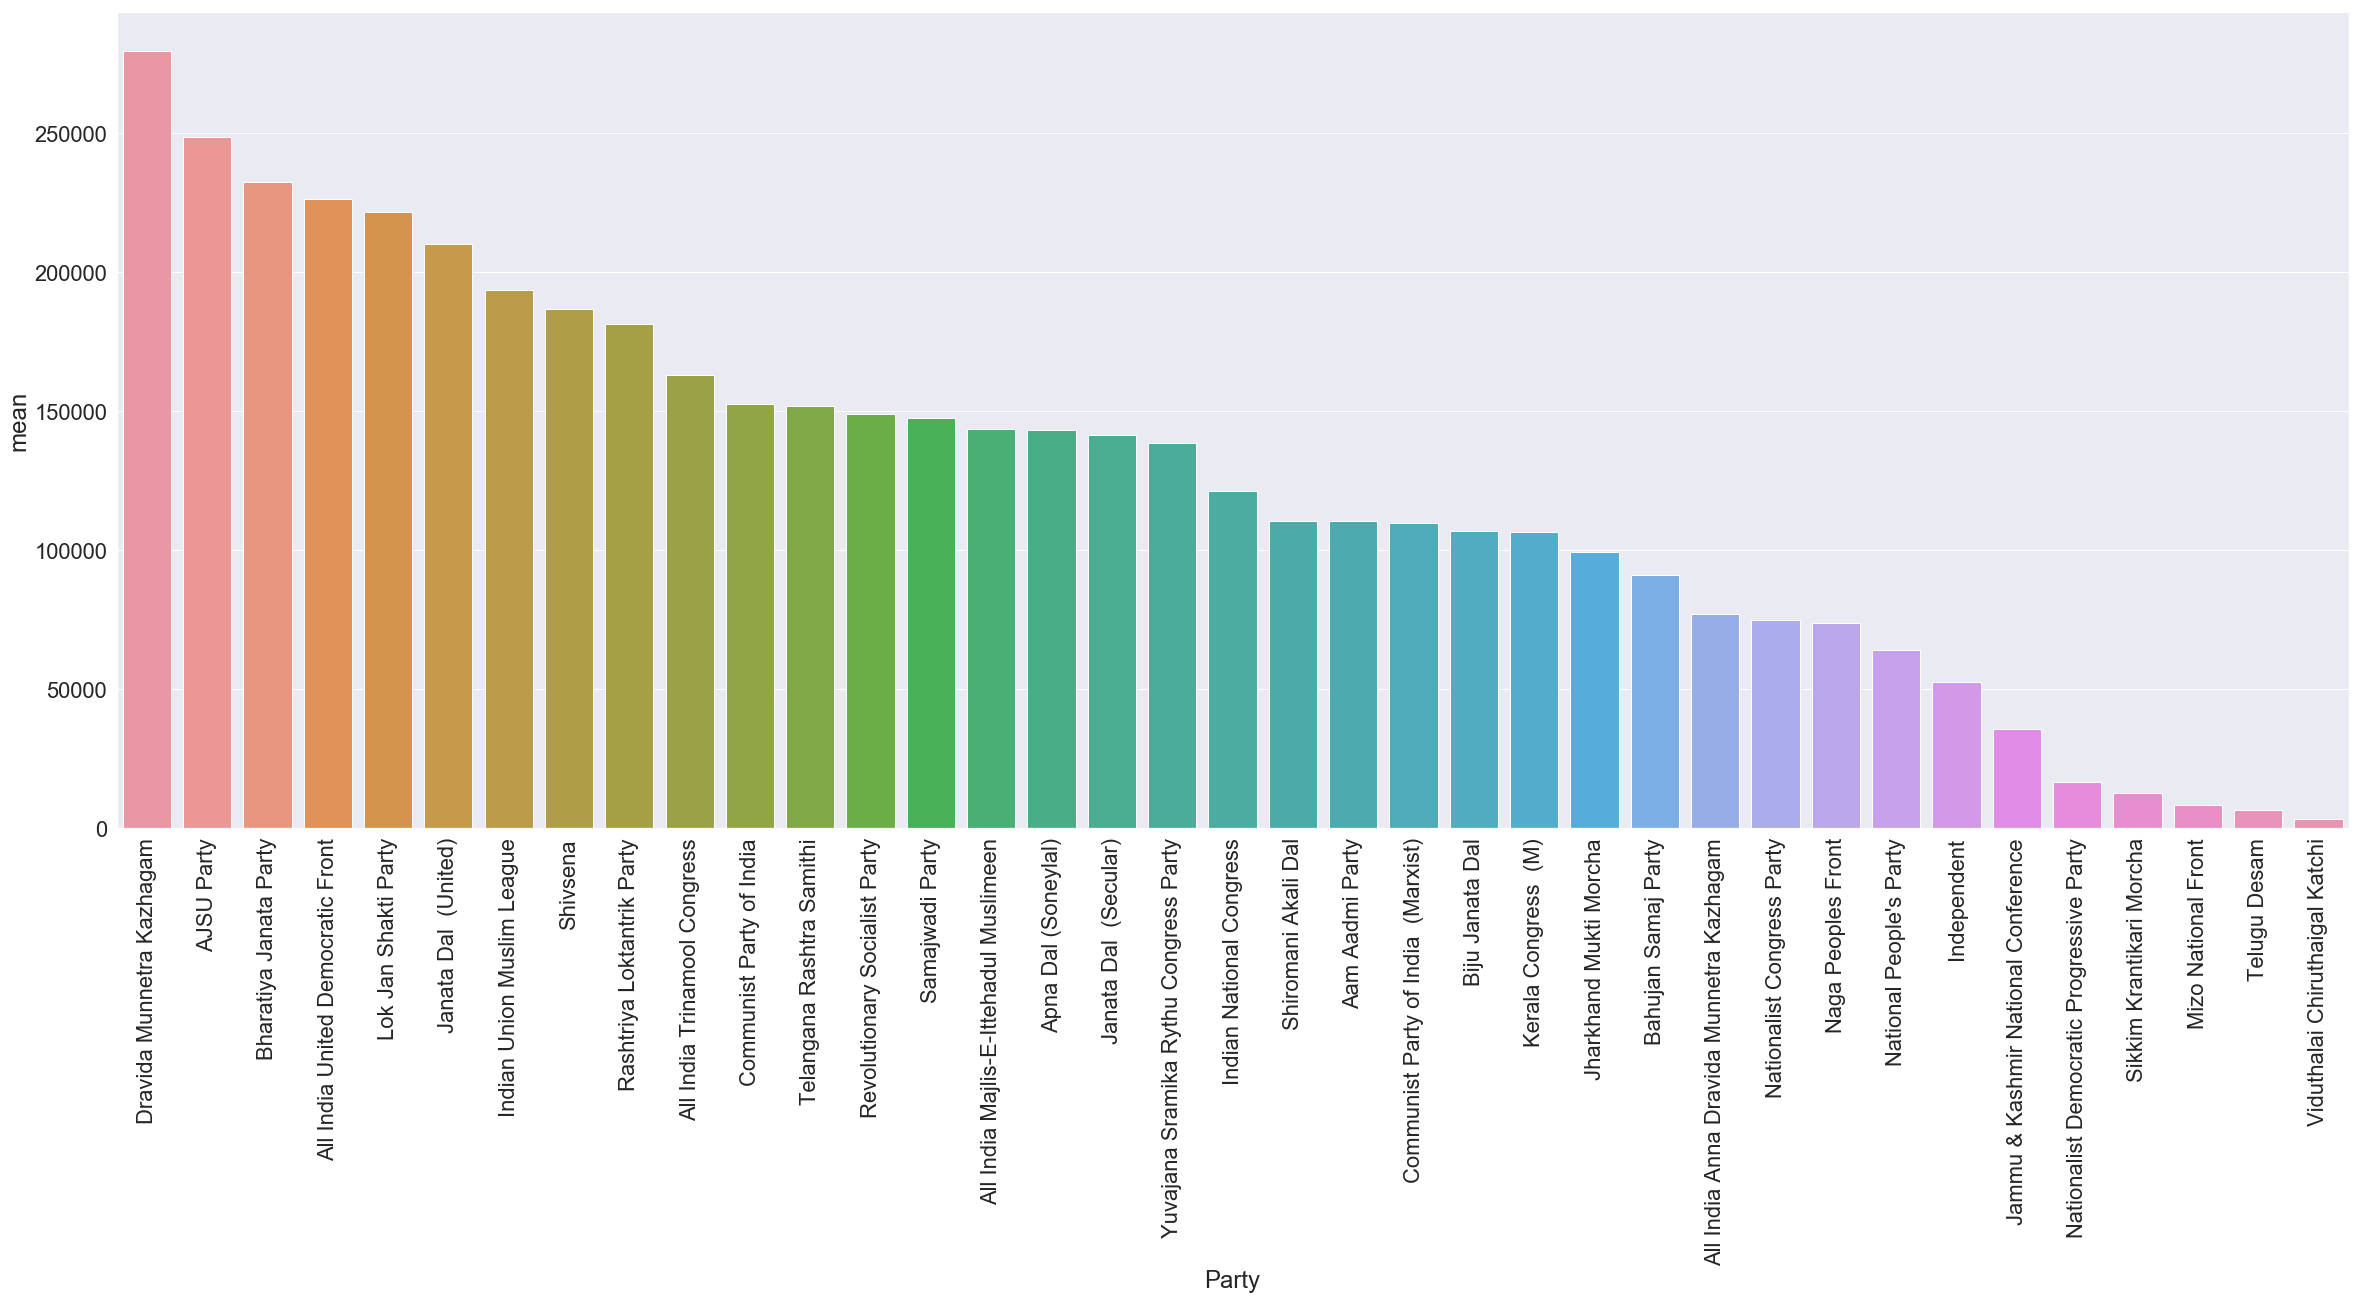

In [5]:
plt.figure(figsize=(40,15))
sns.set(font_scale=2)
party_agg = winner.groupby('Party')['Vote_Diff'].agg({'mean'}).sort_values('mean', ascending=False)
party_agg = party_agg.reset_index()
plt.xticks(rotation=90)
sns.barplot('Party', 'mean', data= party_agg);

In [ ]:
df.